### Import necessary libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
import requests
import pickle

### loading the dataset

In [40]:
df_remax=pd.read_csv('remax_vente.csv')

In [41]:
df_star_vente=pd.read_csv('properstar_vente.csv')
df_star_vente_commercial=pd.read_csv('properstar_commercial_vente.csv')
df_star=pd.concat([df_star_vente,df_star_vente_commercial])

## Data exploration

### Properstar data

In [42]:
df_star.head(3)

,statut,link,title,address,prix,Pièces,Etages,Chambres,Salles de bains,Toilettes,...,Vue sur la forêt,Vue sur la montagne,Centre de remise en forme,Hammam,Vue du village,Vue du port,Vue sur la campagne,Garage,Vue sur la verdure,Vue sur le parc
0,Vente,https://www.properstar.fr/annonce/104215563,"Maison à vendre à Ez Zahra, Tunisie",Ez Zahra,250 €,7.0,1.0,5.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vente,https://www.properstar.fr/annonce/102753772,"Appartement à vendre à Jardins de Carthage, Tu...",Jardins De Carthage,130 929 €,2.0,9.0,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vente,https://www.properstar.fr/annonce/104409743,"Appartement à vendre à Gammarth, Tunisie",Gammarth,418 372 €,6.0,2.0,5.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df_star.shape

(521, 93)

In [44]:
df_star.columns

Index(['statut', 'link', 'title', 'address', 'prix', 'Pièces', 'Etages',
       'Chambres', 'Salles de bains', 'Toilettes', 'Places de parc extérieur',
       'Habitable', 'Total', 'Alarme', '1', 'Ascenseur', 'Balcon', 'Type',
       'Année de construction', 'Appartements', 'Piscine', 'Terrasse',
       'Climatisation', 'Concierge 24/7', 'Internet', 'Parking', 'Sécurité',
       'Aéroport', 'Autoroute', 'Centre-ville', 'Ecole primaire / élémentaire',
       'Ecole secondaire', 'Garderie', 'Hôpital ou clinique', 'Magasins',
       'Université', 'Orientation Nord', 'Vue de la rue', 'Vue du ciel',
       'Condition', 'Chauffage', 'Eau chaude', 'Déchets des eaux usées',
       'Centre de sport', 'Docteur', 'Parking public', 'Supermarché', 'Taxi',
       'Transports publics', 'Standing', 'Terrain', 'Jardin', 'Meublé',
       'Places de parc intérieures', 'Machine à laver',
       'Télévision par satellite', 'Parc', 'Année de rénovation', 'Interphone',
       'Station de ski', 'Orientation N

In [45]:
df_star.isna().sum().sort_values(ascending=True).head(15)

statut                     0
link                       0
prix                       0
title                      9
address                    9
Pièces                    62
1                         63
Habitable                 72
Type                      90
Total                    120
Etages                   218
Chambres                 270
Année de construction    272
Salles de bains          283
Condition                288
dtype: int64

In [46]:
columns_to_keep=['address','Type', 'Habitable', 'Total','Terrain',
       'Pièces', 'Salles de bains', 'Chambres','Garage','Jardin','Balcon','Meublé','Piscine','Etages', 'prix']
df_star=df_star[columns_to_keep]
df_star.head()

,address,Type,Habitable,Total,Terrain,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix
0,Ez Zahra,NaN,380 m²,380 m²,NaN,7.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,250 €
1,Jardins De Carthage,Appartement,103 m²,103 m²,NaN,2.0,1.0,1.0,NaN,NaN,Balcon,NaN,NaN,9.0,130 929 €
2,Gammarth,Appartement,354 m²,354 m²,NaN,6.0,5.0,5.0,NaN,NaN,Balcon,NaN,Piscine,2.0,418 372 €
3,Sousse,Appartement,135 m²,155 m²,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,5.0,177 281 €
4,Sousse,Maison,630 m²,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174 572 €


In [47]:
df_star.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521 entries, 0 to 27
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          512 non-null    object 
 1   Type             431 non-null    object 
 2   Habitable        449 non-null    object 
 3   Total            401 non-null    object 
 4   Terrain          118 non-null    object 
 5   Pièces           459 non-null    float64
 6   Salles de bains  238 non-null    float64
 7   Chambres         251 non-null    float64
 8   Garage           1 non-null      object 
 9   Jardin           10 non-null     object 
 10  Balcon           125 non-null    object 
 11  Meublé           88 non-null     object 
 12  Piscine          94 non-null     object 
 13  Etages           303 non-null    float64
 14  prix             521 non-null    object 
dtypes: float64(4), object(11)
memory usage: 65.1+ KB


In [48]:
df_star.isna().sum().sort_values(ascending=False)

Garage             520
Jardin             511
Meublé             433
Piscine            427
Terrain            403
Balcon             396
Salles de bains    283
Chambres           270
Etages             218
Total              120
Type                90
Habitable           72
Pièces              62
address              9
prix                 0
dtype: int64

### remax data

In [49]:
df_remax.head(3)

,statut,link,title,prix,address,statut_marche,m²,Surface constructible (m²),Année/Mois de Construction,Places de parking,...,Upgraded interior,Energy Efficient,Tennis Court,Année de construction,Baie Vitrée,Garage avec porte automatisée,Garage individuel,Brique,Accès facile en voiture,Villa
0,Vente,https://www.remax.com.tn/fr-tn/biens/apparteme...,Appartement - Vente - Ennasr 1-2 Ariana Tunisie,"386,000 TND",Ennasr 1-2 - Ariana - Tunisie,Nouveau sur le marché,122,122,2018/01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Vente,https://www.remax.com.tn/fr-tn/biens/terrain-a...,Terrain agricole - Vente - Enfida Sousse Tunisie,"500,000 TND",Enfida - 4030 - Enfida - Sousse - Tunisie,Excellente valeur,"250,000",100,2019/12,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Vente,https://www.remax.com.tn/fr-tn/biens/etage-de-...,Etage de Maison/ Villa - Vente - Hammam Ghezèz...,"2,000,000 TND",Hammam Ghezèze - Nabeul - Tunisie,Nouveau sur le marché,790,600,2025/01,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_remax.shape

(583, 148)

In [51]:
df_remax.columns

Index(['statut', 'link', 'title', 'prix', 'address', 'statut_marche', 'm²',
       'Surface constructible (m²)', 'Année/Mois de Construction',
       'Places de parking',
       ...
       'Upgraded interior', 'Energy Efficient', 'Tennis Court',
       'Année de construction', 'Baie Vitrée', 'Garage avec porte automatisée',
       'Garage individuel', 'Brique', 'Accès facile en voiture', 'Villa'],
      dtype='object', length=148)

In [52]:
df_remax.isna().sum().sort_values(ascending=True).head(10)

statut                          0
link                            0
title                           0
prix                            0
address                         0
m²                             75
statut_marche                 135
Surface constructible (m²)    154
Nombre de pièces              198
Nombre de chambres            208
dtype: int64

In [53]:
columns_to_keep=['title','address', 'm²', 'Surface constructible (m²)','Surface Terrain (m²)',
       'Nombre de pièces', 'Nombre salles de bain', 'Nombre de chambres',
       'Garage','Garage individuel','Garage avec porte automatisée','Jardin',
       'Balcon','Meublé','Piscine','Piscine extérieure',"Nombre d'étages", 'prix']
df_remax=df_remax[columns_to_keep]
df_remax.head(3)


,title,address,m²,Surface constructible (m²),Surface Terrain (m²),Nombre de pièces,Nombre salles de bain,Nombre de chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Nombre d'étages,prix
0,Appartement - Vente - Ennasr 1-2 Ariana Tunisie,Ennasr 1-2 - Ariana - Tunisie,122,122,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"386,000 TND"
1,Terrain agricole - Vente - Enfida Sousse Tunisie,Enfida - 4030 - Enfida - Sousse - Tunisie,"250,000",100,"250,000",2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"500,000 TND"
2,Etage de Maison/ Villa - Vente - Hammam Ghezèz...,Hammam Ghezèze - Nabeul - Tunisie,790,600,660,5.0,7.0,8.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,2.0,"2,000,000 TND"


In [54]:
df_remax.rename(columns={
    'm²': 'Habitable',
    'Surface constructible (m²)': 'Terrain',
    'Surface Terrain (m²)': 'Total',
    'Nombre de chambres':'Chambres',
    'Nombre de pièces':'Pièces',
    'Nombre salles de bain':'Salles de bains',
    "Nombre d'étages":'Etages'
}, inplace=True)
df_remax.head(1)

,title,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Etages,prix
0,Appartement - Vente - Ennasr 1-2 Ariana Tunisie,Ennasr 1-2 - Ariana - Tunisie,122,122,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,"386,000 TND"


### Data Cleaning

### properstar

#### Prix column

In [55]:
df_remax['prix'].sample(3)

73      1,500,000 TND
191    Nous consulter
309       592,000 TND
Name: prix, dtype: object

In [56]:
df_star['prix'].sample(3)
#prices are in euro => we need to convert them to TND

19     269 383 €
205    361 184 €
123    151 998 €
Name: prix, dtype: object

In [57]:
#update the price column
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace('€','') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace('\u202f', '') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: str(x).replace(' ','') if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_star['prix'] = df_star['prix'].apply(lambda x: x + "000" if isinstance(x, str) and len(x) < 4 else x)
df_star['prix'] = pd.to_numeric(df_star['prix'], errors='coerce')


In [58]:
API_KEY = "cur_live_VxYPVVMtGszXGu8LDX9l4AbamFmdEfbOYFDt0ojS"  
API_URL = f"https://api.currencyapi.com/v3/latest?apikey={API_KEY}&currencies=TND&base_currency=EUR"
# Fetch exchange rate from API
response = requests.get(API_URL)
data = response.json()
# Extract the exchange rate
eur_to_tnd_rate = data['data']['TND']['value']
# Convert 'prix' column from EUR to TND
df_star['prix'] = df_star['prix'] * eur_to_tnd_rate
df_star['prix'] = df_star['prix'].apply(lambda x: str(int(x)) if isinstance(x, (int, float)) else x)
df_star['prix'] = pd.to_numeric(df_star['prix'], errors='coerce')


#### Habitable,Total and Terrain

In [59]:
df_star[['Habitable','Total','Terrain']].sample(1)

,Habitable,Total,Terrain
311,535 m²,535 m²,NaN


In [60]:
df_remax[['Habitable','Total','Terrain']].sample(1)

,Habitable,Total,Terrain
182,102,NaN,102


In [61]:
def clean_size_column(df, col):
    """
    Cleans a size-related column by:
    1. Removing 'm²' and any non-breaking spaces.
    2. Stripping leading/trailing spaces.
    3. Converting cleaned values to numeric (float).
    4. Handling missing or invalid values gracefully.
    """
    df[col] = df[col].astype(str)  # Convert all to string to prevent errors
    df[col] = df[col].str.replace('m²', '', regex=False)  # Remove 'm²'
    df[col] = df[col].str.replace('\u202f', '', regex=False)  # Remove non-breaking spaces
    df[col] = df[col].str.replace(' ', '', regex=False)  # Remove normal spaces
    df[col] = df[col].str.strip()  # Strip leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float, setting errors to NaN

# Example usage
columns_to_clean = ['Habitable', 'Total', 'Terrain']  # List of size-related columns
for col in columns_to_clean:
    clean_size_column(df_star, col)

# Check the cleaned columns
df_star[columns_to_clean].head()


,Habitable,Total,Terrain
0,380.0,380.0,NaN
1,103.0,103.0,NaN
2,354.0,354.0,NaN
3,135.0,155.0,NaN
4,630.0,NaN,NaN


#### Type column

In [62]:
df_star['Type'].value_counts()

Type
Appartement    293
Maison         125
Commercial      13
Name: count, dtype: int64

In [63]:
df_star['Type'] = df_star['Type'].replace({'Appartement': 'Residential','Maison':'Residential'})
df_star['Type'].value_counts()

Type
Residential    418
Commercial      13
Name: count, dtype: int64

### remax

#### title column

In [64]:
df_remax[['title']].sample(3)

,title
452,Appartement - Vente - Hammamet Sud Nabeul Tunisie
211,Duplex - Vente - La Marsa Tunis Tunisie
10,Building - Vente - El Omrane supérieur Tunis T...


In [65]:
df_remax['title'] = df_remax['title'].str.split('-').str[0]
# Remove trailing/leading spaces
df_remax['Type'] = df_remax['title'].str.strip()

# Handle specific cases for "1" and "6 and More"
df_remax = df_remax[ (df_remax['Type']!='6 and More') & (df_remax['Type']!='1') ]

# Optional: categorize property types
def categorize_property(property_type):
    if property_type in ["Appartement", "Villa", "Maison", "Duplex", "Penthouse", "Studio", "Résidence"]:
        return "Residential"
    elif property_type in ["Commercial", "Showroom", "Bureau", "Office", "Local Commercial", "Building"]:
        return "Commercial"
    elif property_type in ["Terrain", "Lot", "Land", "Agricole"]:
        return "Land"
    elif property_type in ["Hôtel", "Warehouse", "Usine", "Entrepôt", "Industrie"]:
        return "Industrial"
    else:
        return "Other"
df_remax['Type'] = df_remax['Type'].apply(categorize_property)
df_remax=df_remax.drop(columns=['title'])
df_remax['Type'].value_counts()

Type
Residential    354
Other          113
Land            90
Commercial      22
Name: count, dtype: int64

#### other columns

In [66]:
df_remax.sample(1)

,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Etages,prix,Type
554,Djerba - Houmt Souk - Djerba - Houmt Souk - Mé...,400,200,400,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0,"510,000 TND",Other


In [67]:
#change column types
df_remax['Habitable'] = df_remax['Habitable'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Habitable'] = pd.to_numeric(df_remax['Habitable'], errors='coerce')
df_remax['Total'] = df_remax['Total'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Total'] = pd.to_numeric(df_remax['Total'], errors='coerce')
df_remax['Terrain'] = df_remax['Terrain'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_remax['Terrain'] = pd.to_numeric(df_remax['Terrain'], errors='coerce')

df_remax['prix'] = df_remax['prix'].apply(lambda x: str(x).replace('TND','') if isinstance(x, str) else x)
df_remax['prix'] = df_remax['prix'].apply(lambda x: str(x).replace(',','') if isinstance(x, str) else x)
df_remax['prix'] = df_remax['prix'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df_remax['prix'] = pd.to_numeric(df_remax['prix'], errors='coerce')

columns_with_zero=['Garage','Garage individuel','Garage avec porte automatisée','Jardin','Balcon','Meublé','Piscine','Piscine extérieure']
for col in columns_with_zero:
    df_remax[col]=df_remax[col].fillna(0)
df_remax.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   address                        579 non-null    object 
 1   Habitable                      503 non-null    float64
 2   Terrain                        425 non-null    float64
 3   Total                          296 non-null    float64
 4   Pièces                         383 non-null    float64
 5   Salles de bains                371 non-null    float64
 6   Chambres                       373 non-null    float64
 7   Garage                         579 non-null    float64
 8   Garage individuel              579 non-null    float64
 9   Garage avec porte automatisée  579 non-null    float64
 10  Jardin                         579 non-null    float64
 11  Balcon                         579 non-null    float64
 12  Meublé                         579 non-null    float64


In [68]:
df_remax.sample(1)

,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Garage individuel,Garage avec porte automatisée,Jardin,Balcon,Meublé,Piscine,Piscine extérieure,Etages,prix,Type
479,Djerba - Midoun - Médenine - Tunisie,7.029,NaN,192.0,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,Residential


In [69]:
df_remax['Garage'] = df_remax[['Garage', 'Garage individuel', 'Garage avec porte automatisée']].max(axis=1)

In [70]:
df_remax['Piscine'] = df_remax[['Piscine', 'Piscine extérieure']].max(axis=1)

In [71]:
#drop columns that we don't need
columns_to_drop=['Garage individuel', 'Garage avec porte automatisée','Piscine extérieure']
df_remax=df_remax.drop(columns_to_drop,axis=1)
df_remax.head(1)

,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type
0,Ennasr 1-2 - Ariana - Tunisie,122.0,122.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,386000.0,Residential


#### combine the two dataframes into one

In [72]:
df=pd.concat([df_remax,df_star])
print(df.shape)
df.head(3)

(1100, 15)


,address,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type
0,Ennasr 1-2 - Ariana - Tunisie,122.0,122.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,2.0,386000.0,Residential
1,Enfida - 4030 - Enfida - Sousse - Tunisie,250.0,100.0,250.0,2.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,500000.0,Other
2,Hammam Ghezèze - Nabeul - Tunisie,790.0,600.0,660.0,5.0,7.0,8.0,0.0,1.0,1.0,0.0,0.0,2.0,2000000.0,Other


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 27
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          1091 non-null   object 
 1   Habitable        952 non-null    float64
 2   Terrain          543 non-null    float64
 3   Total            697 non-null    float64
 4   Pièces           842 non-null    float64
 5   Salles de bains  609 non-null    float64
 6   Chambres         624 non-null    float64
 7   Garage           580 non-null    object 
 8   Jardin           589 non-null    object 
 9   Balcon           704 non-null    object 
 10  Meublé           667 non-null    object 
 11  Piscine          673 non-null    object 
 12  Etages           635 non-null    float64
 13  prix             1008 non-null   float64
 14  Type             1010 non-null   object 
dtypes: float64(8), object(7)
memory usage: 137.5+ KB


In [74]:
#this part gets us the latitude and longitude 
geolocator = Nominatim(user_agent="my_unique_app_12345")

def get_coordinates(address):
    try:
        location = geolocator.geocode(address, timeout=10)  # Increase timeout
        if location:
            return pd.Series([location.latitude, location.longitude])
    except GeocoderTimedOut:
        time.sleep(1)  # Wait and retry in case of timeout
        return get_coordinates(address)  # Retry
    return pd.Series([None, None])

df[['Latitude', 'Longitude']] = df['address'].apply(get_coordinates)

In [75]:
df[['address','Latitude','Longitude']].head()

,address,Latitude,Longitude
0,Ennasr 1-2 - Ariana - Tunisie,36.862262,10.169746
1,Enfida - 4030 - Enfida - Sousse - Tunisie,36.078178,10.435924
2,Hammam Ghezèze - Nabeul - Tunisie,36.933532,11.068121
3,Cité Jawaher 1 - 8050 - Hammamet - Nabeul - Tu...,NaN,NaN
4,Akouda - Akouda - Sousse - Tunisie,35.865730,10.567838


In [ ]:
""""
df_geo=df[['address','Latitude','Longitude']]
df_geo=df_geo.drop_duplicates()
df_geo=df_geo.dropna()
df_geo.to_csv('geocode_cache.csv', index=False)
"""

### Data cleaning

In [74]:
df_clean=df.drop(columns=['address'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 0 to 27
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Habitable        952 non-null    float64
 1   Terrain          543 non-null    float64
 2   Total            697 non-null    float64
 3   Pièces           842 non-null    float64
 4   Salles de bains  609 non-null    float64
 5   Chambres         624 non-null    float64
 6   Garage           580 non-null    object 
 7   Jardin           589 non-null    object 
 8   Balcon           704 non-null    object 
 9   Meublé           667 non-null    object 
 10  Piscine          673 non-null    object 
 11  Etages           635 non-null    float64
 12  prix             1008 non-null   float64
 13  Type             1010 non-null   object 
 14  Latitude         963 non-null    float64
 15  Longitude        963 non-null    float64
dtypes: float64(10), object(6)
memory usage: 146.1+ KB


In [75]:
df_clean=df_clean.dropna(subset=['prix'])
df_clean.shape

(1008, 16)

In [76]:
from sklearn.impute import KNNImputer
# Assuming df is your dataframe
imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors
df_clean[['Latitude', 'Longitude']] = imputer.fit_transform(df_clean[['Latitude', 'Longitude']])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 27
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Habitable        875 non-null    float64
 1   Terrain          480 non-null    float64
 2   Total            647 non-null    float64
 3   Pièces           776 non-null    float64
 4   Salles de bains  542 non-null    float64
 5   Chambres         557 non-null    float64
 6   Garage           488 non-null    object 
 7   Jardin           497 non-null    object 
 8   Balcon           612 non-null    object 
 9   Meublé           575 non-null    object 
 10  Piscine          581 non-null    object 
 11  Etages           575 non-null    float64
 12  prix             1008 non-null   float64
 13  Type             918 non-null    object 
 14  Latitude         1008 non-null   float64
 15  Longitude        1008 non-null   float64
dtypes: float64(10), object(6)
memory usage: 133.9+ KB


In [77]:
df_clean['Jardin'].value_counts()

Jardin
0.0         279
1.0         208
Jardin        2
10000 m²      1
129 m²        1
330 m²        1
300 m²        1
270 m²        1
216 m²        1
421 m²        1
245 m²        1
Name: count, dtype: int64

In [78]:
df_clean['Jardin'].fillna(0,inplace=True)
df_clean['Jardin'] = df_clean['Jardin'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Jardin'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\3393552808.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Jardin'].fillna(0,inplace=True)


Jardin
0    790
1    218
Name: count, dtype: int64

In [79]:
df_clean['Balcon'].value_counts()

Balcon
0.0       328
1.0       159
Balcon    125
Name: count, dtype: int64

In [80]:
df_clean['Balcon'].fillna(0,inplace=True)
df_clean['Balcon'] = df_clean['Balcon'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Balcon'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\234478673.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Balcon'].fillna(0,inplace=True)


Balcon
0    724
1    284
Name: count, dtype: int64

In [81]:
df_clean['Meublé'].value_counts()

Meublé
0.0       431
Meublé     88
1.0        56
Name: count, dtype: int64

In [82]:
df_clean['Meublé'].fillna(0,inplace=True)
df_clean['Meublé'] = df_clean['Meublé'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Meublé'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\1602645294.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Meublé'].fillna(0,inplace=True)


Meublé
0    864
1    144
Name: count, dtype: int64

In [83]:
df_clean['Piscine'].value_counts()

Piscine
0.0        405
Piscine     94
1.0         82
Name: count, dtype: int64

In [84]:
df_clean['Piscine'].fillna(0,inplace=True)
df_clean['Piscine'] = df_clean['Piscine'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Piscine'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\2679576601.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Piscine'].fillna(0,inplace=True)


Piscine
0    832
1    176
Name: count, dtype: int64

In [85]:
df_clean['Garage'].value_counts()

Garage
0.0       315
1.0       172
Garage      1
Name: count, dtype: int64

In [86]:
df_clean['Garage'].fillna(0,inplace=True)
df_clean['Garage'] = df_clean['Garage'].apply(lambda x: 1 if x != 0.0 else 0)
df_clean['Garage'].value_counts()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\51011127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Garage'].fillna(0,inplace=True)


Garage
0    835
1    173
Name: count, dtype: int64

In [87]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1008 entries, 0 to 27
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Habitable        875 non-null    float64
 1   Terrain          480 non-null    float64
 2   Total            647 non-null    float64
 3   Pièces           776 non-null    float64
 4   Salles de bains  542 non-null    float64
 5   Chambres         557 non-null    float64
 6   Garage           1008 non-null   int64  
 7   Jardin           1008 non-null   int64  
 8   Balcon           1008 non-null   int64  
 9   Meublé           1008 non-null   int64  
 10  Piscine          1008 non-null   int64  
 11  Etages           575 non-null    float64
 12  prix             1008 non-null   float64
 13  Type             918 non-null    object 
 14  Latitude         1008 non-null   float64
 15  Longitude        1008 non-null   float64
dtypes: float64(10), int64(5), object(1)
memory usage: 133.9+ KB


In [88]:
def plot_distribution(data,title,xlabel):
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)  # kde=True will add a kernel density estimate curve to visualize distribution smoothly
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.show()

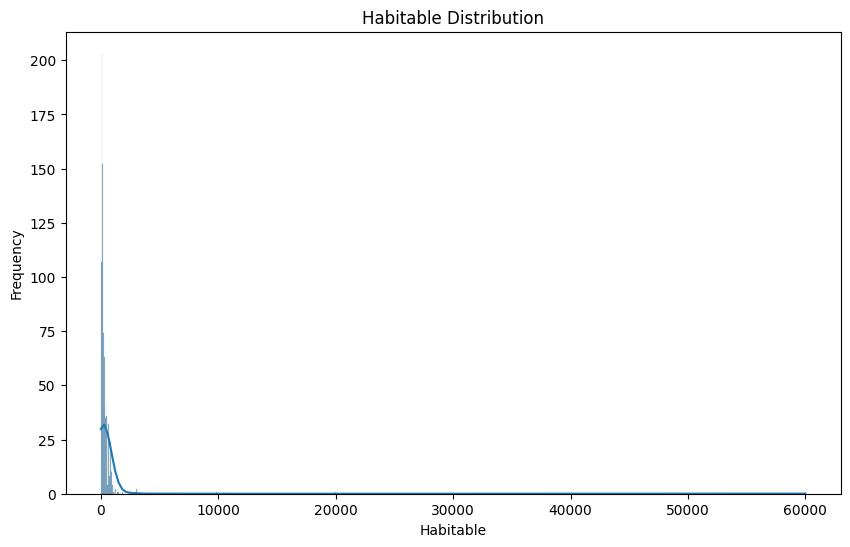

In [89]:
plot_distribution(df_clean['Habitable'],'Habitable Distribution','Habitable')

In [90]:
# Replace missing values with median since the distribution is skwed
df_clean['Habitable'].fillna(df_clean['Habitable'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\1680901862.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Habitable'].fillna(df_clean['Habitable'].median(), inplace=True)


In [91]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["Habitable"])) < 3)]

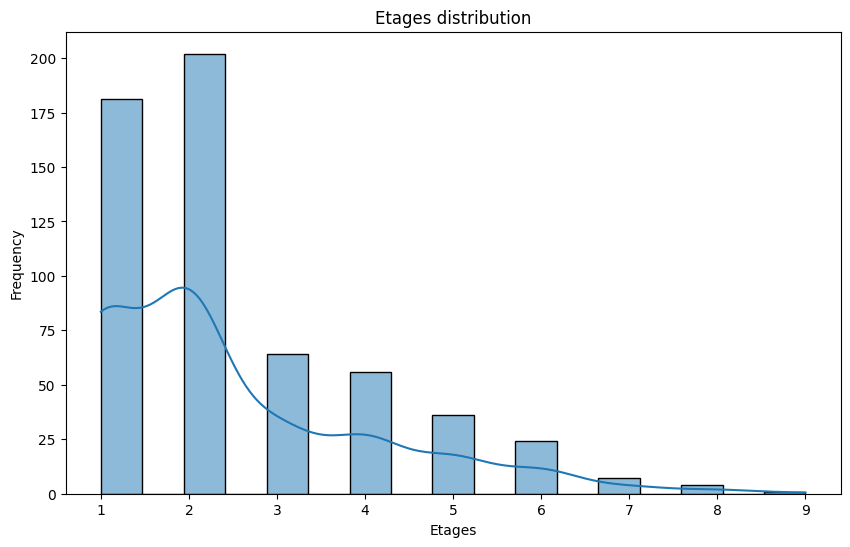

In [92]:
plot_distribution(df_clean['Etages'],'Etages distribution','Etages')

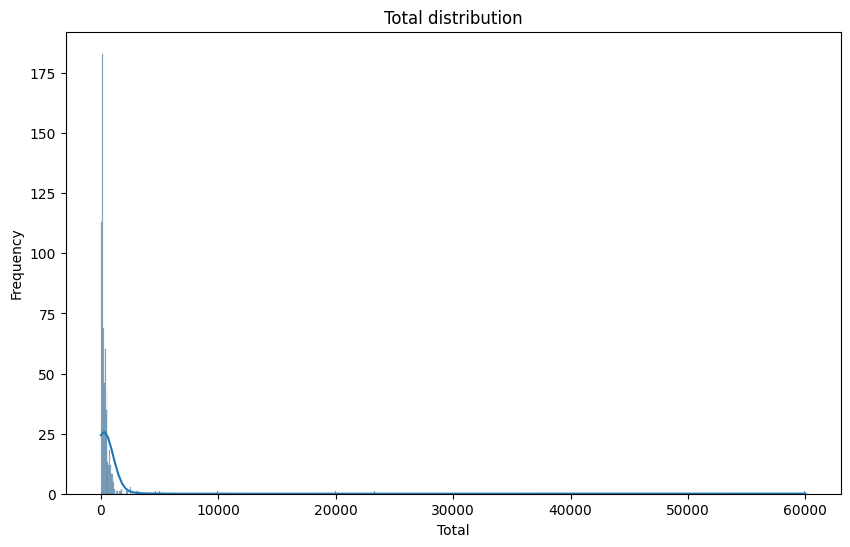

In [93]:
plot_distribution(df_clean['Total'],'Total distribution','Total')

In [94]:
# Replace missing values with median since the distribution is skwed
df_clean['Total'].fillna(df_clean['Total'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\484258427.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Total'].fillna(df_clean['Total'].median(), inplace=True)


In [95]:
df_clean['Terrain'] = df_clean['Terrain'].apply(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_clean['Terrain'] = pd.to_numeric(df_clean['Terrain'], errors='coerce')


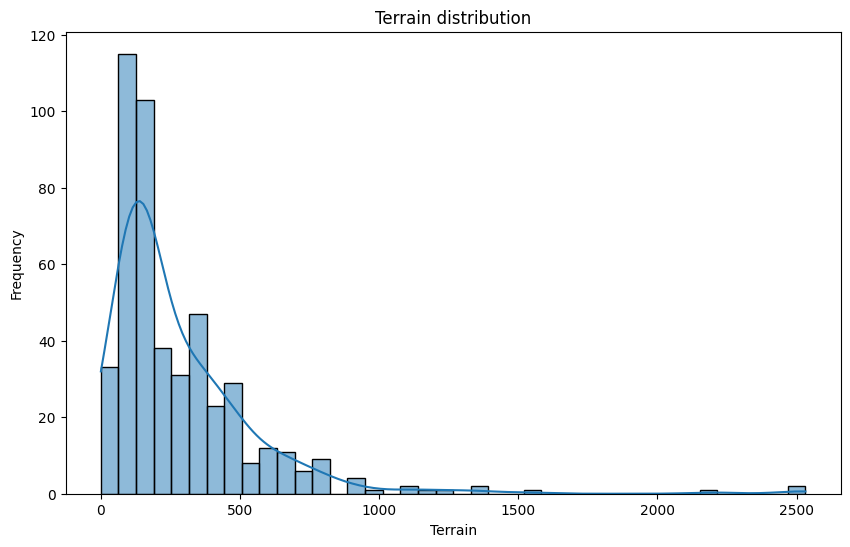

In [96]:
plot_distribution(df_clean['Terrain'],'Terrain distribution','Terrain')

In [97]:
df_clean['Terrain'].fillna(df_clean['Terrain'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\69587176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Terrain'].fillna(df_clean['Terrain'].median(), inplace=True)


In [98]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["Total"])) < 3)]

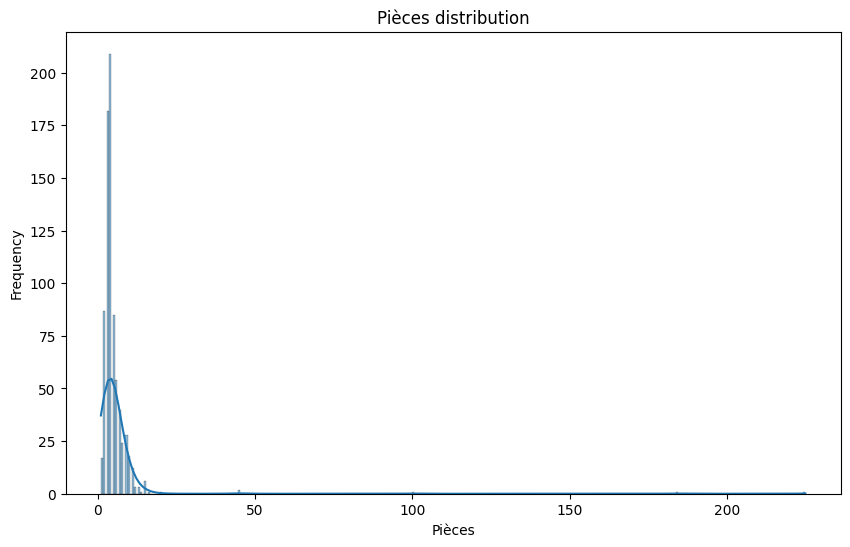

In [99]:
plot_distribution(df_clean['Pièces'],'Pièces distribution','Pièces')

In [100]:
# Replace missing values with median since the distribution is skwed
df_clean['Pièces'].fillna(df_clean['Pièces'].median(), inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\3906860705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Pièces'].fillna(df_clean['Pièces'].median(), inplace=True)


In [101]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["Pièces"])) < 3)]

In [102]:
df_clean = df_clean[df_clean['Pièces']<20]

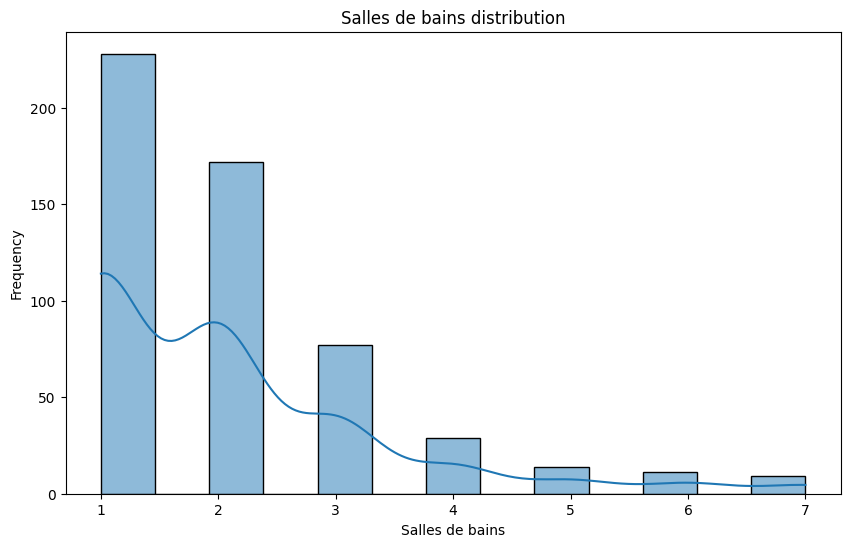

In [103]:
plot_distribution(df_clean['Salles de bains'],'Salles de bains distribution','Salles de bains')

In [104]:
# Replace missing values with mode since the distribution is categorical
df_clean['Salles de bains'].fillna(df_clean['Salles de bains'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\2135588293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Salles de bains'].fillna(df_clean['Salles de bains'].mode()[0], inplace=True)


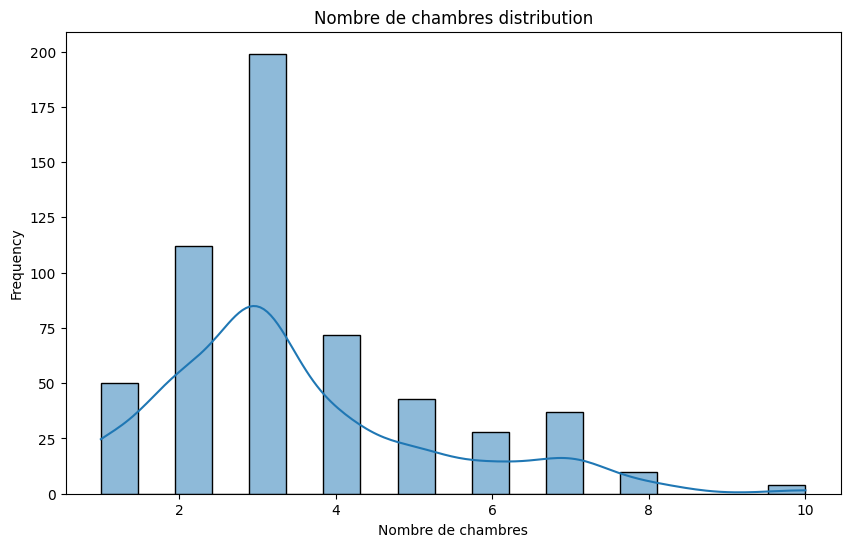

In [105]:
plot_distribution(df_clean['Chambres'],'Nombre de chambres distribution','Nombre de chambres')

In [106]:
# Replace missing values with mode since the distribution is categorical
df_clean['Chambres'].fillna(df_clean['Chambres'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\3383310863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Chambres'].fillna(df_clean['Chambres'].mode()[0], inplace=True)


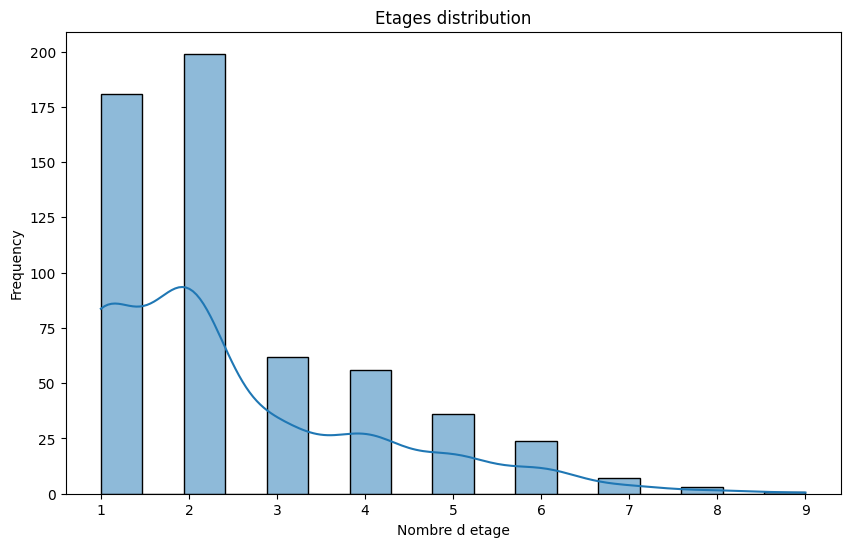

In [107]:
plot_distribution(df_clean['Etages'],'Etages distribution','Nombre d etage')

In [108]:
# Replace missing values with mode since the distribution is categorical
df_clean['Etages'].fillna(df_clean['Etages'].mode()[0], inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\1566603011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Etages'].fillna(df_clean['Etages'].mode()[0], inplace=True)


In [109]:
#df_clean = df_clean[(np.abs(stats.zscore(df_clean["prix"])) < 3)]

In [110]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to numerical columns
for col in ["prix", "Habitable", "Total","Terrain", "Pièces"]:
    df_clean = remove_outliers_iqr(df_clean, col)


In [111]:
df_clean['prix'].describe()

count    4.740000e+02
mean     4.471745e+05
std      3.112801e+05
min      0.000000e+00
25%      2.693362e+05
50%      3.860000e+05
75%      5.822012e+05
max      1.615462e+06
Name: prix, dtype: float64

In [112]:
df_clean = df_clean[df_clean['prix'] > 0]

In [113]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 0 to 24
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Habitable        441 non-null    float64
 1   Terrain          441 non-null    float64
 2   Total            441 non-null    float64
 3   Pièces           441 non-null    float64
 4   Salles de bains  441 non-null    float64
 5   Chambres         441 non-null    float64
 6   Garage           441 non-null    int64  
 7   Jardin           441 non-null    int64  
 8   Balcon           441 non-null    int64  
 9   Meublé           441 non-null    int64  
 10  Piscine          441 non-null    int64  
 11  Etages           441 non-null    float64
 12  prix             441 non-null    float64
 13  Type             420 non-null    object 
 14  Latitude         441 non-null    float64
 15  Longitude        441 non-null    float64
dtypes: float64(10), int64(5), object(1)
memory usage: 58.6+ KB


### Columns correlation

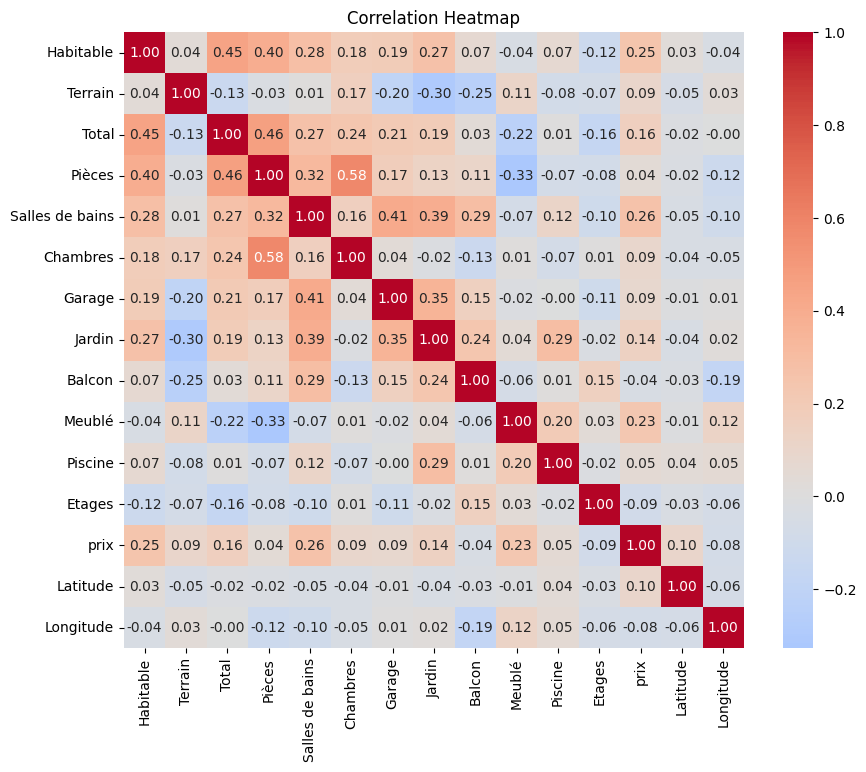

In [114]:
# Filter only numeric columns
df_numeric = df_clean.select_dtypes(include=["number"])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

# Display the heatmap
plt.title("Correlation Heatmap")
plt.show()


### Encoding

In [115]:
df_clean.head(1)

,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Type,Latitude,Longitude
0,122.0,122.0,192.0,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,Residential,36.862262,10.169746


In [116]:
# Find the most frequent (mode) value
most_frequent = df_clean['Type'].mode()[0]
# Fill missing values with the most frequent value
df_clean['Type'].fillna(most_frequent, inplace=True)
df_encoded = pd.get_dummies(df_clean, columns=['Type'], drop_first=True)
df_encoded.head()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9560\2319487793.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Type'].fillna(most_frequent, inplace=True)


,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Latitude,Longitude,Type_Land,Type_Other,Type_Residential
0,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,False,False,True
12,13.85,180.0,13.85,4.0,1.0,3.0,0,0,0,0,0,2.0,380000.0,36.301456,10.454091,True,False,False
13,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,800.0,36.753115,10.068519,False,True,False
14,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,350.0,36.753115,10.068519,True,False,False
17,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,False,False,True


In [117]:
bool_columns = ["Type_Land", "Type_Other", "Type_Residential"]
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)
df_encoded.head()

,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Latitude,Longitude,Type_Land,Type_Other,Type_Residential
0,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,0,0,1
12,13.85,180.0,13.85,4.0,1.0,3.0,0,0,0,0,0,2.0,380000.0,36.301456,10.454091,1,0,0
13,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,800.0,36.753115,10.068519,0,1,0
14,163.00,180.0,192.00,4.0,1.0,3.0,0,0,0,0,0,2.0,350.0,36.753115,10.068519,1,0,0
17,122.00,122.0,192.00,4.0,1.0,3.0,1,0,0,0,0,2.0,386000.0,36.862262,10.169746,0,0,1


In [118]:
syn_df=pd.read_csv('synthatic_data_vente.csv')
syn_df=syn_df.drop(columns='Unnamed: 0')
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Habitable         5000 non-null   float64
 1   Terrain           5000 non-null   float64
 2   Total             5000 non-null   float64
 3   Pièces            5000 non-null   float64
 4   Salles de bains   5000 non-null   float64
 5   Chambres          5000 non-null   float64
 6   Garage            5000 non-null   int64  
 7   Jardin            5000 non-null   int64  
 8   Balcon            5000 non-null   int64  
 9   Meublé            5000 non-null   int64  
 10  Piscine           5000 non-null   int64  
 11  Etages            5000 non-null   float64
 12  prix              5000 non-null   float64
 13  Latitude          5000 non-null   float64
 14  Longitude         5000 non-null   float64
 15  Type_Land         5000 non-null   int64  
 16  Type_Other        5000 non-null   int64  


In [119]:
df_encoded.sample(2)

,Habitable,Terrain,Total,Pièces,Salles de bains,Chambres,Garage,Jardin,Balcon,Meublé,Piscine,Etages,prix,Latitude,Longitude,Type_Land,Type_Other,Type_Residential
350,163.0,180.0,192.0,4.0,1.0,3.0,0,0,0,0,0,2.0,280000.0,36.811331,10.094704,1,0,0
420,107.0,180.0,192.0,4.0,1.0,3.0,0,0,0,0,0,2.0,325963.0,36.401267,10.557283,0,0,1


In [120]:
df_encoded.shape

(441, 18)

In [121]:
final_df=pd.concat([df_encoded,syn_df])
final_df.shape

(5441, 18)

In [ ]:
#final_df.to_csv('final_df_vente.csv') we are gonna use it to generate synthatic data 

### Building the model

In [123]:
X=final_df.drop(columns=['prix'])
y=final_df['prix']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [124]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5441 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Habitable         5441 non-null   float64
 1   Terrain           5441 non-null   float64
 2   Total             5441 non-null   float64
 3   Pièces            5441 non-null   float64
 4   Salles de bains   5441 non-null   float64
 5   Chambres          5441 non-null   float64
 6   Garage            5441 non-null   int64  
 7   Jardin            5441 non-null   int64  
 8   Balcon            5441 non-null   int64  
 9   Meublé            5441 non-null   int64  
 10  Piscine           5441 non-null   int64  
 11  Etages            5441 non-null   float64
 12  Latitude          5441 non-null   float64
 13  Longitude         5441 non-null   float64
 14  Type_Land         5441 non-null   int64  
 15  Type_Other        5441 non-null   int64  
 16  Type_Residential  5441 non-null   int64  
dtype

In [125]:
# ✅ Define the model with the best hyperparameters
from sklearn.ensemble import GradientBoostingRegressor
sgb = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=7,
    min_samples_leaf=5,
    min_samples_split=10,
    n_estimators=700,
    subsample=0.7,
    random_state=42
)

# ✅ Train the model
sgb.fit(X_train, y_train)

# ✅ Predict on test data
y_pred = sgb.predict(X_test)

# ✅ Compute Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# ✅ Print results
print(f"🔹 Real RMSE: {rmse:.2f}")
print(f"🔹 Mean Absolute Error: {mae:.2f}")
print(f"🔹 R² Score: {r2:.4f}")


🔹 Real RMSE: 46903.48
🔹 Mean Absolute Error: 8076.08
🔹 R² Score: 0.9743


### Download the model

In [ ]:
with open('model_vente','wb') as f:
    pickle.dump(sgb,f)